# Comparativo entre Classificação

Por Thierry Pierre e Vinícius Lettiéri.

Para esse trabalho utilizaremos dados de qualidade de vinho do seguinte dataset: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [287]:
data = pd.read_csv("../dados/WineQT.csv")

In [288]:
# Removendo a coluna de Id
data = data.drop("Id", axis=1)

In [289]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [290]:
feature_columns = data.columns[:-1]

In [291]:
data['quality'] = data['quality'].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5})

# Colunas

........ TODO ........

# Análise Inicial dos Dados

Podemos ver que existem **1143 linhas no total** e nenhum dado nulo.

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


De forma geral os valores parecem seguir um intervalo aceitável de acordo com seus significados. A maioria parece ter um comportamento normal. Porém, se analisarmos em relação às quantidades recomendadas, vemos que em geral estão bem alteradas. Podemos entender esse comportamento com mais análises específicas.

In [246]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,2.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,3.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


## Dados Duplicados

Existem dados duplicados, podemos removê-los visto que as informações não trazem novidades.

In [292]:
len(data) - len(data.drop_duplicates())

125

In [293]:
data = data.drop_duplicates()

## Distribuições das Features

Podemos comparar a distribuição dos dados separando pelas classes e analisar como se comportam.

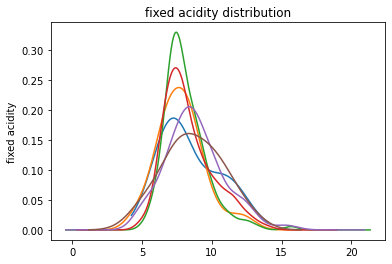

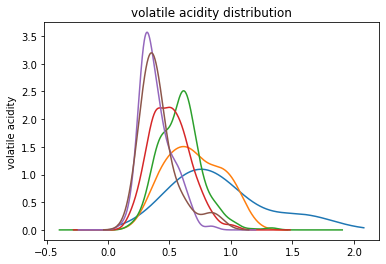

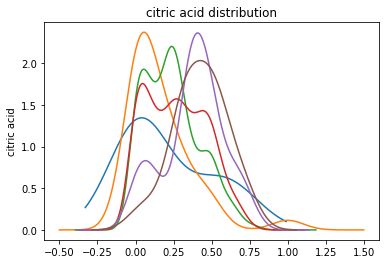

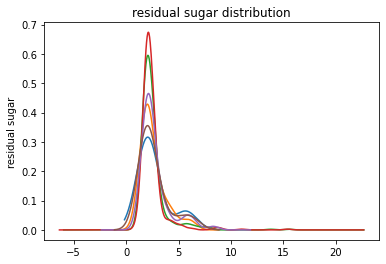

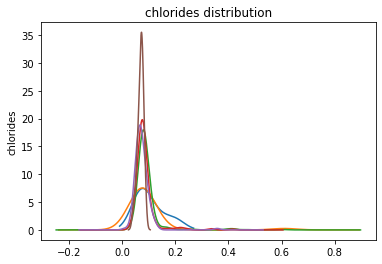

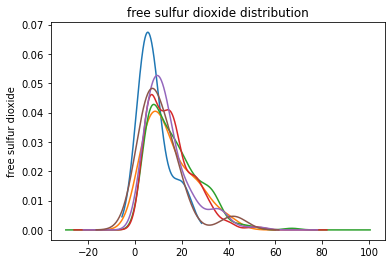

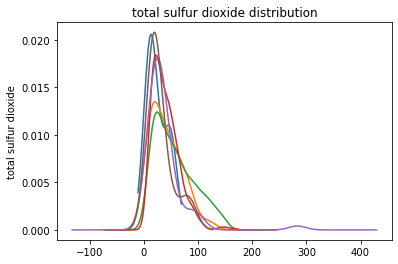

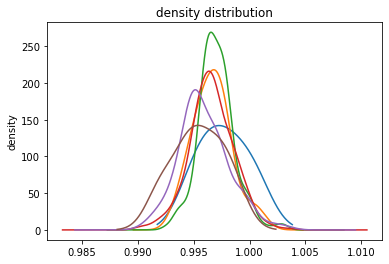

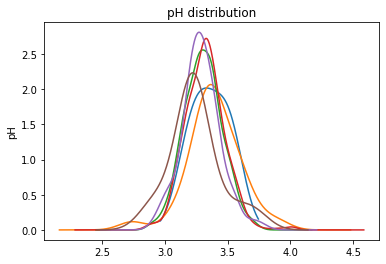

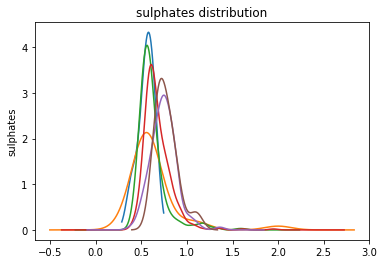

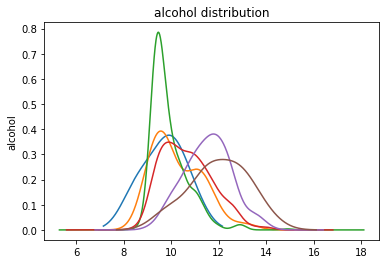

In [294]:
for column in feature_columns:
    for quality in sorted(data.quality.unique()):
        data[data["quality"] == quality][column].plot.kde()
    
    plt.gca().set(title=f"{column} distribution", ylabel=column)
    plt.show()

## Análise de Box Plot

Podemos ver uma grande quantidade de possíveis outliers para tratarmos.

In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data[feature_columns])
standardized = pd.DataFrame(scaler.transform(data[feature_columns]), columns=feature_columns)

px.box(standardized)

In [251]:
from sklearn import preprocessing

normalized = preprocessing.normalize(data[feature_columns], axis=0)
normalized = pd.DataFrame(normalized, columns=feature_columns)

px.box(normalized)

## Feature Selection

In [295]:
quantidade_piores_features = 0

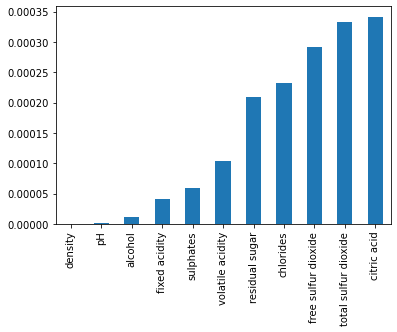

In [296]:
data_variance = normalized.var().sort_values()
data_variance.plot.bar()

In [297]:
feature_columns = data_variance.index[quantidade_piores_features:]
data = data[feature_columns].assign(quality=data['quality'])

In [298]:
data.head()

,density,pH,alcohol,fixed acidity,sulphates,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,citric acid,quality
0,0.9978,3.51,9.4,7.4,0.56,0.70,1.9,0.076,11.0,34.0,0.00,2
1,0.9968,3.20,9.8,7.8,0.68,0.88,2.6,0.098,25.0,67.0,0.00,2
2,0.9970,3.26,9.8,7.8,0.65,0.76,2.3,0.092,15.0,54.0,0.04,2
3,0.9980,3.16,9.8,11.2,0.58,0.28,1.9,0.075,17.0,60.0,0.56,3
5,0.9978,3.51,9.4,7.4,0.56,0.66,1.8,0.075,13.0,40.0,0.00,2


## Remoção de Outliers

In [299]:
import scikit_posthocs as sp

In [300]:
def drop_outliers(df, feature_columns):
    """ Utilizamos a analise de outliers por distancia interquartil.
        Realiza o drop olhando todas as colunas das feature columns.
    """

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    _filter = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)
    df_trips_filtrado = df[_filter]

    return df_trips_filtrado

In [301]:
def drop_outliers_by_class(df, feature_columns, class_column):
    """ Realiza o drop a partir dos dados agrupados por suas classes, para manter suas distribuições por classe corretas """
    return df.groupby(class_column).apply(drop_outliers, feature_columns).reset_index(drop=True)

In [302]:
data_filtered = drop_outliers_by_class(data, feature_columns, 'quality')

In [303]:
scaler = StandardScaler().fit(data_filtered[feature_columns])
standardized = pd.DataFrame(scaler.transform(data_filtered[feature_columns]), columns=feature_columns)

px.box(standardized)

Class 0 with 1 instance


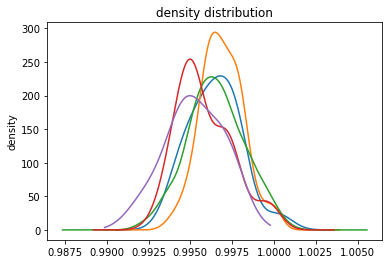

Class 0 with 1 instance


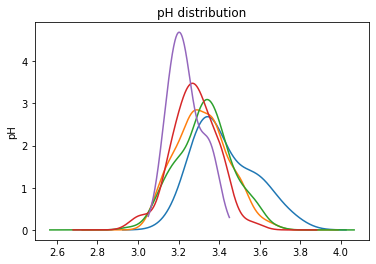

Class 0 with 1 instance


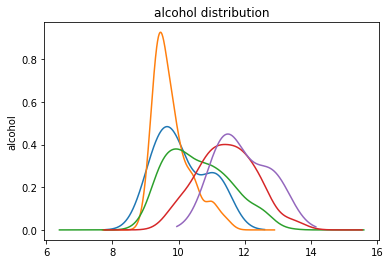

Class 0 with 1 instance


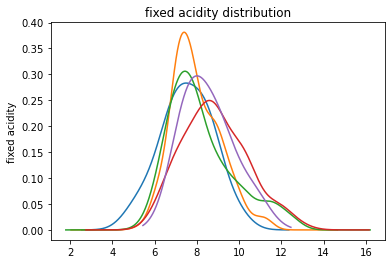

Class 0 with 1 instance


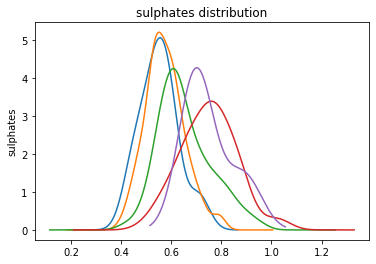

Class 0 with 1 instance


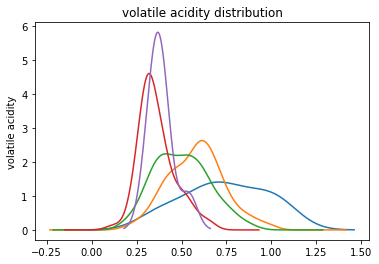

Class 0 with 1 instance


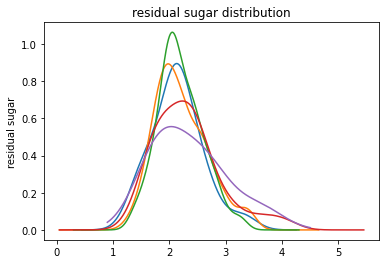

Class 0 with 1 instance


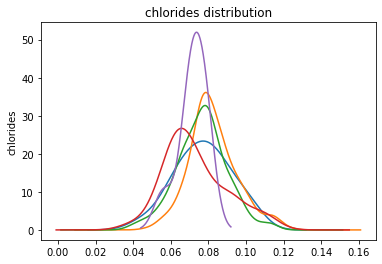

Class 0 with 1 instance


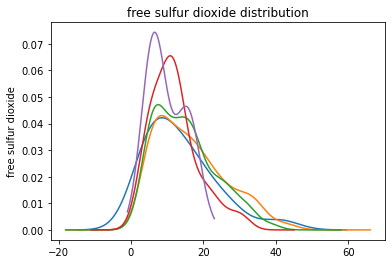

Class 0 with 1 instance


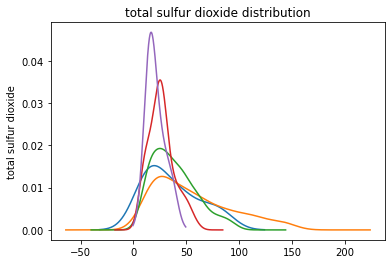

Class 0 with 1 instance


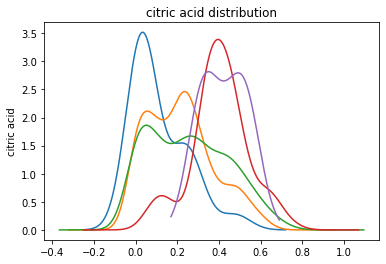

In [304]:
for column in feature_columns:
    for quality in sorted(data_filtered.quality.unique()):
        df = data_filtered[data_filtered["quality"] == quality]
        if len(df) > 1:
            df[column].plot.kde()
        else:
            print(f"Class {quality} with 1 instance")
    
    plt.gca().set(title=f"{column} distribution", ylabel=column)
    plt.show()

# Balanceamento de Dados

Podemos ver que existe certo desbalanceamento dos dados, o que podemos tratar posteriormente.

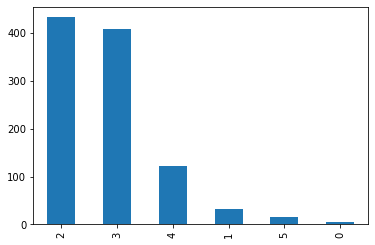

In [305]:
data["quality"].value_counts().plot.bar()

Para utilizarmos em nossos testes posteriormente, também criaremos os dataframes balanceados.

In [306]:
from imblearn.over_sampling import SMOTE 

oversample = SMOTE()
X_balanceado, Y_balanceado = oversample.fit_resample(data.drop(["quality"], axis=1), data["quality"])

In [264]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler()
# X_train_balanceado, Y_train_balanceado = ros.fit_resample(X_train, Y_train)

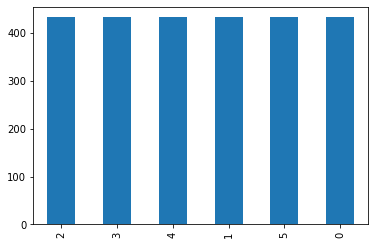

In [307]:
Y_balanceado.value_counts().plot.bar()

# Separação e Teste

In [308]:
# data = data_filtered

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X_train, X_test, Y_train, Y_test = train_test_split(X_balanceado, Y_balanceado, test_size=1/3, random_state=42)

# Teste de Classificação

In [311]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

## Regressão Logística

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [313]:
def train_logistic_regression(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = MinMaxScaler()
    model = LogisticRegression(random_state=42, multi_class="multinomial", max_iter=max_iter)
    logistic_regression_pipeline = Pipeline(
        steps=[("scaler", scaler), ("logistic", model)]
    )

    logistic_regression_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    # print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
    # print("Precision Micro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Precision Macro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("Recall Micro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Recall Macro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("F1-score Micro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("F1-score Macro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))

    # matriz_confusao = metrics.confusion_matrix(Y_test.tolist(), Y_pred, labels=model.classes_)
    # metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_).plot()

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [314]:
train_logistic_regression(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       144
           1       1.00      0.00      0.00       144
           2       0.24      0.60      0.34       138
           3       1.00      0.00      0.00       156
           4       0.18      0.67      0.29       140
           5       1.00      0.00      0.00       144

    accuracy                           0.20       866
   macro avg       0.74      0.21      0.10       866
weighted avg       0.75      0.20      0.10       866



In [315]:
train_logistic_regression(X_train_balanceado, Y_train_balanceado, X_test, Y_test)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       144
           1       1.00      0.00      0.00       144
           2       0.23      0.62      0.34       138
           3       1.00      0.00      0.00       156
           4       0.18      0.65      0.28       140
           5       1.00      0.00      0.00       144

    accuracy                           0.20       866
   macro avg       0.74      0.21      0.10       866
weighted avg       0.75      0.20      0.10       866



## Support Vector Machine - SVC

In [316]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [317]:
def train_svc(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = MinMaxScaler()
    model = SVC(random_state=42, gamma='auto')
    svc_pipeline = Pipeline(
        steps=[("scaler", scaler), ("svc", model)]
    )

    svc_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    # print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
    # print("Precision Micro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Precision Macro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("Recall Micro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Recall Macro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("F1-score Micro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("F1-score Macro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))

    # matriz_confusao = metrics.confusion_matrix(Y_test.tolist(), Y_pred, labels=model.classes_)
    # metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_).plot()

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [318]:
train_svc(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       144
           1       0.17      1.00      0.29       144
           2       1.00      0.00      0.00       138
           3       1.00      0.00      0.00       156
           4       1.00      0.00      0.00       140
           5       1.00      0.00      0.00       144

    accuracy                           0.17       866
   macro avg       0.86      0.17      0.05       866
weighted avg       0.86      0.17      0.05       866



In [319]:
train_svc(X_train_balanceado, Y_train_balanceado, X_test, Y_test)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       144
           1       0.17      1.00      0.29       144
           2       1.00      0.00      0.00       138
           3       1.00      0.00      0.00       156
           4       1.00      0.00      0.00       140
           5       1.00      0.00      0.00       144

    accuracy                           0.17       866
   macro avg       0.86      0.17      0.05       866
weighted avg       0.86      0.17      0.05       866



## Naive Bayes Classifier

Comentar sobre isso https://stats.stackexchange.com/questions/254723/standardisation-in-naive-bayes

In [320]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [321]:
def train_naive_bayes(X_train, Y_train, X_test, Y_test, max_iter=1000):
    model = MultinomialNB()
    naivebayes_pipeline = Pipeline(
        steps=[("naive bayes", model)]
    )

    naivebayes_pipeline.fit(X_train.values, Y_train.values)
    Y_pred = model.predict(X_test.values)

    # print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
    # print("Precision Micro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Precision Macro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("Recall Micro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Recall Macro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("F1-score Micro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("F1-score Macro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))

    # matriz_confusao = metrics.confusion_matrix(Y_test.tolist(), Y_pred, labels=model.classes_)
    # metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_).plot()

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [322]:
train_naive_bayes(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.35      0.62      0.45       144
           1       0.22      0.11      0.15       144
           2       0.33      0.43      0.37       138
           3       0.30      0.18      0.22       156
           4       0.38      0.15      0.22       140
           5       0.34      0.48      0.40       144

    accuracy                           0.33       866
   macro avg       0.32      0.33      0.30       866
weighted avg       0.32      0.33      0.30       866



In [323]:
train_naive_bayes(X_train_balanceado, Y_train_balanceado, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.53      0.62      0.57       144
           1       0.38      0.15      0.21       144
           2       0.33      0.46      0.38       138
           3       0.29      0.20      0.24       156
           4       0.31      0.15      0.20       140
           5       0.34      0.66      0.45       144

    accuracy                           0.37       866
   macro avg       0.36      0.37      0.34       866
weighted avg       0.36      0.37      0.34       866



# Random Forest

In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [325]:
def train_random_forecast(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = MinMaxScaler()
    model = RandomForestClassifier(random_state=42)
    random_forest_pipeline = Pipeline(
        steps=[("scaler", scaler), ("random forest", model)]
    )

    random_forest_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    # print("Acurácia:", metrics.accuracy_score(Y_test.tolist(), Y_pred))
    # print("Precision Micro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Precision Macro:", metrics.precision_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("Recall Micro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("Recall Macro:", metrics.recall_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))
    # print("F1-score Micro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='micro', zero_division=1))
    # print("F1-score Macro:", metrics.f1_score(Y_test.tolist(), Y_pred, average='macro', zero_division=1))

    # matriz_confusao = metrics.confusion_matrix(Y_test.tolist(), Y_pred, labels=model.classes_)
    # metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=model.classes_).plot()

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [326]:
train_random_forecast(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       144
           1       0.47      0.06      0.11       144
           2       0.13      0.03      0.05       138
           3       0.22      0.06      0.09       156
           4       0.18      0.99      0.30       140
           5       1.00      0.00      0.00       144

    accuracy                           0.19       866
   macro avg       0.50      0.19      0.09       866
weighted avg       0.50      0.19      0.09       866



In [327]:
train_random_forecast(X_train_balanceado, Y_train_balanceado, X_test, Y_test)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       144
           1       1.00      0.00      0.00       144
           2       0.18      0.09      0.12       138
           3       0.20      0.56      0.29       156
           4       0.32      0.84      0.47       140
           5       1.00      0.00      0.00       144

    accuracy                           0.25       866
   macro avg       0.62      0.25      0.15       866
weighted avg       0.62      0.25      0.15       866

